# StellarDynamics_HW_Chap03

Sorry, I failed to write a reproducible homework based on programming. QAQ.

3.1

a.  
modified from (3.23b), the rariated power is  

$$
P = \frac{{2{{\left| {{\mathbf{\ddot m}}} \right|}^2}}}{{3{c^3}}}
$$

Only the component that perpendicular to the rotation axis contributes to the radiation, and the variation of dipole is contributed only by the component perpendicular to the rotation axis,  

$$
{\mathbf{m}} \propto {e^{i\omega t}},  
$$
so that  
$$ \left| {{\mathbf{\ddot m}}} \right| = {\omega ^2}\left| {\mathbf{m}} \right|\sin \alpha $$

Comparing to electric field, we can get a similiar form of relation between field and dipole,  

Electric potential:  
$$
\phi  = \frac{e}{{\left| {\mathbf{r}} \right|}} - \frac{e}{{\left| {{\mathbf{r}} - {\mathbf{d}}} \right|}} = \frac{{e\left| {{\mathbf{r}} - {\mathbf{d}}} \right| - e\left| {\mathbf{r}} \right|}}{{\left| {\mathbf{r}} \right|\left| {{\mathbf{r}} - {\mathbf{d}}} \right|}} \approx \frac{{ed\cos \theta }}{{{r^2}}}
$$

Note $ed$ is the electric dipole.

$$
{\mathbf{E}} = \nabla \phi  = (\frac{\partial }{{\partial r}}\hat r + \frac{1}{r}\frac{\partial }{{\partial \theta }}\hat \theta  + \frac{1}{{r\sin \theta }}\frac{\partial }{{\partial \phi }}\hat \phi )\frac{{ed\cos \theta }}{{{r^2}}} \\
 =  - 2\frac{{ed\cos \theta }}{{{r^3}}}\hat r - \frac{{ed\sin \theta }}{{{r^3}}}\hat \theta 
$$

So that,  

$$
{{\mathbf{B}}_{\mathbf{0}}} =  - 2\frac{m}{{{r^3}}}\hat r  
$$
and  
$$
\left| {\mathbf{m}} \right| = \frac{{{B_0}R_0^3}}{2}
$$

So the answer is  
$$
P = \frac{{2{\omega ^4}{{\left( {\frac{{{B_0}R_0^3}}{2}} \right)}^2}{{\sin }^2}\alpha }}{{3{c^3}}} = \frac{{{\omega ^4}B_0^2R_0^6{{\sin }^2}\alpha }}{{6{c^3}}}.
$$

b.  

So we can build the connection between rotation energy and radiation power. 

$$
P =  - {{\dot E}_{rot}},  
$$
with  
$$
{E_{rot}} = \frac{1}{5}M{R^2}{\omega ^2}
$$

So that  
$$
P = \frac{{{\omega ^4}B_0^2R_0^6{{\sin }^2}\alpha }}{{6{c^3}}} =  - \frac{2}{5}M{R_0}^2\omega \dot \omega  =  - {{\dot E}_{rot}}.
$$

He have  
$$
\tau  \equiv \frac{{ - \omega }}{{\dot \omega }} = \frac{{12M{c^3}}}{{5{\omega ^2}B_0^2R_0^4{{\sin }^2}\alpha }}
$$

c. 

In [7]:
from scipy import constants as c
import numpy as np

In [95]:
def radiation_power(**kwargs):
    '''cgs unit radiation power'''
    return kwargs['w']**4 * kwargs['B']**2 * \
        kwargs['R']**6 * \
        np.sin(kwargs['a'] * np.pi / 180)**2 / \
        (6 * (c.speed_of_light * 100)**3)

values = {'M': 2*10**33., 
          'R': 10**6., 
          'B': 10**12., 
          'a': 90.}        
ws = [10**4., 10**3., 10**2.]        
Ps = map(lambda w:radiation_power(w=w, 
    B=values['B'], R=values['R'], a=values['a']), 
    ws)
for p,w in zip(Ps, ws):
    print('w = {:.2g}; P = {:.2g}'.format(w, p))

w = 1e+04; P = 6.2e+43
w = 1e+03; P = 6.2e+39
w = 1e+02; P = 6.2e+35


In [93]:
def time_scale(**kwargs):
    '''cgs unit time-scale'''
    return 12 * kwargs['M'] * (c.speed_of_light * 100)**3 /\
    (5 * kwargs['R']**4 * kwargs['w']**2 * \
     kwargs['B']**2 *\
     np.sin(kwargs['a'] * np.pi / 180)**2)
    
taus = list(map(lambda w:time_scale(w=w, 
    M=values['M'], R=values['R'], a=values['a'], B=values['B']), 
    ws))
for yr,w in zip((tau / 60 / 60 / 24 / 365 for tau in taus),
               ws):
    print('w = {:.2g}; {:.2g} yr'.format(w, yr))

w = 1e+04; 41 yr
w = 1e+03; 4.1e+03 yr
w = 1e+02; 4.1e+05 yr


3.3  
a.  
Larmor Eq:  
$$
{{\mathbf{E}}_{{\mathbf{rad}}}} = \left[ {(q/R{c^2}){\mathbf{n}} \times ({\mathbf{n}} \times {\mathbf{\dot n}})} \right]
$$

With: 

$$
u = r\omega \cos \omega t
$$

$$
\dot u =  - r{\omega ^2}\cos \omega t\\
q\dot u =  - d{\omega ^2}\cos \omega t
$$

Larmor Eq becomes:  
$$
\left| {{{\mathbf{E}}_{{\mathbf{rad}}}}} \right| =  - \frac{{{\omega ^2}}}{{R{c^2}}}\left[ {{d_1}\cos \omega t + {d_2}\cos (\omega (t - \Delta t))} \right]\sin \theta,
$$

where
$$
\Delta t = (L/c)\sin \theta.
$$

Use the triangular blabla eqaution:  
$$
\cos (\omega (t - \Delta t)) = \cos \omega t\cos \delta  + \sin \omega t\sin \delta.
$$

So that:  
$$
\left| {{{\mathbf{E}}_{{\mathbf{rad}}}}} \right| =  - \frac{{{\omega ^2}}}{{R{c^2}}}\left[ {{d_1}\cos \omega t + {d_2}\cos \omega t\cos \delta  + {d_2}\sin \omega t\sin \delta } \right]\sin \theta.
$$

The average radiation over time is:  
$$
\left\langle {{{\left| {{{\mathbf{E}}_{{\mathbf{rad}}}}} \right|}^2}} \right\rangle  = \frac{{{\omega ^4}{{\sin }^2}\theta }}{{2{R^2}{c^4}}}\left[ {{d_1}^2 + {d_1}{d_2}{{\cos }^2}\delta  + {d_2}^2} \right]
$$

Note that cross terms of $\cos\omega t$ and $\sin\omega t$ are eliminated from the averaged.

For Power per solid angle:  
$$
\left\langle {\frac{{dP}}{{d\Omega }}} \right\rangle  = \frac{{c{R^2}}}{{4\pi }}\left\langle {{{\left| {{{\mathbf{E}}_{{\mathbf{rad}}}}} \right|}^2}} \right\rangle  = \frac{{{\omega ^4}{{\sin }^2}\theta }}{{8\pi {c^3}}}\left[ {{d_1}^2 + {d_1}{d_2}{{\cos }^2}\delta  + {d_2}^2} \right]
$$

b. 

$$
L/\lambda  = \omega L 2\pi \ll 1
$$

So that, 

$$
\delta  = \omega L\sin \theta /c \ll 1.
$$

We got,  
$$
\left\langle {\frac{{dP}}{{d\Omega }}} \right\rangle  = \frac{{{\omega ^4}{{\sin }^2}\theta }}{{8\pi {c^3}}}\left[ {{d_1}^2 + {d_1}{d_2} + {d_2}^2} \right] = \frac{{{\omega ^4}{{\sin }^2}\theta }}{{8\pi {c^3}}}{\left[ {{d_1} + {d_2}} \right]^2}
$$

3.5

This is dipole,  
$$
d = P \times V = \alpha E'\frac{{3\pi {a^3}}}{4} = \alpha {E_0}\cos \omega t\frac{{3\pi {a^3}}}{4}{\left( {1 + \frac{{4\pi \alpha }}{3}} \right)^{ - 1}}
$$

(p.91) cross section can be accessed by  
$$
\sigma  = \frac{{\left\langle P \right\rangle }}{{\left\langle S \right\rangle }}
$$

$$
\left\langle P \right\rangle  = \frac{{2{{{\mathbf{\ddot d}}}^2}}}{{3{c^3}}} = \frac{1}{{3{c^3}}}{\alpha ^2}{E_0}^2{\omega ^4}{\left( {\frac{{3\pi {a^3}}}{4}} \right)^2}{\left( {1 + \frac{{4\pi \alpha }}{3}} \right)^{ - 2}}
$$


$$
\left\langle S \right\rangle  = \frac{{cE_0^2}}{{8\pi }}
$$

we got cross section,  
$$
\sigma  = \frac{{\left\langle P \right\rangle }}{{\left\langle S \right\rangle }} = \frac{{\frac{1}{{3{c^3}}}{\alpha ^2}{E_0}^2{\omega ^4}{{\left( {\frac{{4\pi {a^3}}}{3}} \right)}^2}{{\left( {1 + \frac{{4\pi \alpha }}{3}} \right)}^{ - 2}}}}{{\frac{{cE_0^2}}{{8\pi }}}}
$$

Holy crap, I need to rewrite this thing?? maybe I should try Mathmatica kernel on notebook next time.

$$\sigma  = \frac{{\left\langle P \right\rangle }}{{\left\langle S \right\rangle }} = \frac{{\frac{1}{{3{c^3}}}{\alpha ^2}{E_0}^2{\omega ^4}{{\left( {\frac{{4\pi {a^3}}}{3}} \right)}^2}{{\left( {1 + \frac{{4\pi \alpha }}{3}} \right)}^{ - 2}}}}{{\frac{{cE_0^2}}{{8\pi }}}} = \frac{{8\pi }}{3}{k^4}{a^6}{\left( {1 + \frac{3}{{4\pi \alpha }}} \right)^{ - 2}} \\
= \pi {a^2}\frac{8}{3}{(ka)^4}{\left( {1 + \frac{3}{{4\pi \alpha }}} \right)^{ - 2}} = \pi {a^2}{Q_{scatt}}
$$

The end.....

## Sympy Tutorial

### Symbolic Variables

In [109]:
import sympy as sp
sp.init_printing()
x,y,z,t = sp.symbols('x y z t')
sp.simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [127]:
type(x)

sympy.core.symbol.Symbol

In [130]:
x = sp.Symbol('x', real=True)
x.is_imaginary

False

In [131]:
1+1*sp.I

In [132]:
sp.I**2

In [133]:
(x * sp.I + 1)**2

### Rational Numbers

In [136]:
r1 = sp.Rational(4,5)
r2 = sp.Rational(5,4)

In [137]:
r1

In [138]:
r1 + r2

### Numerical 

In [139]:
sp.pi.evalf(n=50)

In [141]:
y = (x + sp.pi)**2
sp.N(y)

### Expand

In [111]:
sp.expand((x + 1)**2)

In [112]:
sp.expand((x + 1)*(x - 2) - (x - 1)*x)

### Factor

In [113]:
sp.factor(x**3 - x**2 + x - 1)

In [117]:
sp.factor(sp.expand( (sp.cos(x) + sp.sin(x))**2 ))

### Collect

In [121]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [122]:
sp.collect(expr, x)

### Cancel

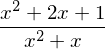

In [123]:
expr = (x**2 + 2*x + 1) / (x**2 + x)
expr

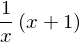

In [124]:
sp.cancel(expr)

### Apart

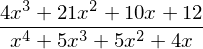

In [125]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

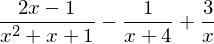

In [126]:
sp.apart(expr)

### Trigonnometric Simplification 